# A Pairs Trading strategy 

**Author:** Simão Moraes Sarmento <br /> 
**Contact:** simaosarmento@hotmail.com

## Dependencies

This notebook requires code from:

Python files:
- `class_SeriesAnalyser.py` - contains a set of functions to deal with time series analysis.
- `class_Trader.py` - contains a set of functions concerning trading strategies.
- `class_DataProcessor.py` - contains a set of functions concerning the data pre processing.

Pickle files:
- pickle file containing pairs to be traded (obtained from running `PairsTrading_CommodityETFs-Clustering.ipynb`)

As a good practise, the notebook solely intends to exemplify the application of different trading strategies for different dataset examples. Please look into the files menitoned above for more detailed info on how the functions are built.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt

# just set the seed for the random number generator
np.random.seed(107)

In [2]:
ticker_path = "data/etfs/pickle/ticker_segment_dict.pickle"
with open(ticker_path, 'rb') as handle:
    ticker_segment_dict = pickle.load(handle)

### Import Classes

In [3]:
%load_ext autoreload
%aimport class_SeriesAnalyser, class_Trader, class_DataProcessor
%autoreload 1

In [4]:
series_analyser = class_SeriesAnalyser.SeriesAnalyser()
trader = class_Trader.Trader()
data_processor = class_DataProcessor.DataProcessor()

# Retrieve prices data set

We start by retrieving the data from a Dataframe saved in a pickle file, as it was previously processed in the `PairsTrading_CommodityETFS_Datapreprocessing.ipynb` notebook.

In [98]:
# intraday
df_prices = pd.read_pickle('data/etfs/pickle/commodity_ETFs_from_2014_complete.pickle')

In [99]:
# split data in training and test
df_prices_train, df_prices_test = data_processor.split_data(df_prices,
                                                            ('01-01-2012',
                                                             '31-12-2014'),
                                                            ('01-01-2015',
                                                             '31-12-2015'),
                                                            remove_nan=True)

Total of 116 tickers
Total of 95 tickers after removing tickers with Nan values


In [100]:
len(df_prices_train)+len(df_prices_test)

77916

# Load Pairs

In [101]:
# intra day
with open('data/etfs/pickle/2012-2016/pairs_no_clustering_intraday.pickle', 'rb') as handle:
    pairs = pickle.load(handle)

#with open('data/etfs/pickle/2012-2016/pairs_no_clustering_intraday_nohurst.pickle', 'rb') as handle:
#    pairs = pickle.load(handle)

#with open('data/etfs/pickle/2012-2016/pairs_no_clustering_intraday_only_coint.pickle', 'rb') as handle:
#    pairs = pickle.load(handle)

In [103]:
len(pairs)

101

# Apply trading strategies

**Applying the fixed beta strategy in validation period**

In [104]:
train_val_split = '2014-01-01'

# intraday
n_years_val = round(len(df_prices_train[train_val_split:])/(240*78))

# interday
#n_years_val = round(len(df_prices_train)/(240))

n_years_val

1

In [105]:
train_results_without_costs, train_results_with_costs, performance_threshold_train = \
        trader.apply_trading_strategy(pairs, 
                                       'fixed_beta',
                                        2,#entry_multiplier,
                                        0,#exit_multiplier,
                                        test_mode=False,
                                        train_val_split=train_val_split
                                       )

sharpe_results_threshold_train_nocosts, cum_returns_threshold_train_nocosts = train_results_without_costs
sharpe_results_threshold_train_w_costs, cum_returns_threshold_train_w_costs = train_results_with_costs

 entry delay turned on.
Pair: 101/101

Average SR:  0.9756735790915363
Annual ROI:  11.265970444866259
76.23762376237623 % of the pairs had positive returns
Sharpe Ratio using annual return 4.439312218246074
Autocorrelation:  0.047680955152882704
Daily Sharpe Ratio 0.2658184327444632
Portfolio Sharpe Ratio:  0.2658184327444632
Total number of trades:  276
Positive trades:  198
Negative trades:  78
Max DD period: 8.0 days
Maximum drawdown of portfolio: -1.35%


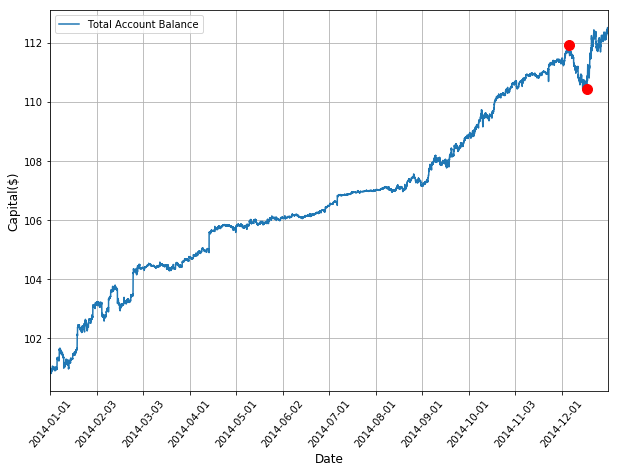

In [106]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_train_w_costs,
                                                  cum_returns_threshold_train_w_costs,
                                                  performance_threshold_train,
                                                  pairs, ticker_segment_dict,
                                                  n_years_val)

In [122]:
print('Corrected Annualized SR: {:.2f}'.format(0.2658184327444632*(252**0.5)))

Corrected Annualized SR: 4.22


Sharpe Ratio Distribution: 


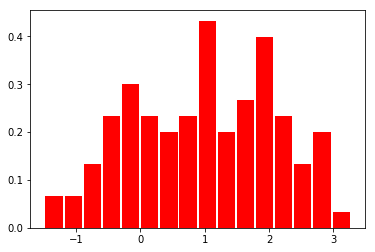

In [107]:
print('Sharpe Ratio Distribution: ')
n, bins, patches = plt.hist(sharpe_results_threshold_train_w_costs, bins = 16, normed=True, orientation='vertical',
                            color='red', rwidth=0.9, align='mid')

In [108]:
#cum_returns_threshold_train_w_costs

In [109]:
betas = list()
for i in range(len(pairs)):
    betas.append(pairs[i][2]['coint_coef'])
np.asarray(betas)

array([ 0.16867686,  0.36914727,  0.20139504,  1.92312674,  0.10892672,
        2.57602378,  1.86658008,  0.24434038,  0.0509225 ,  0.09046071,
        0.75714618,  1.39133223,  2.39499998,  0.23866385,  1.39881789,
        1.67173893,  1.37550723,  0.67513256,  1.05054659,  1.80493701,
        5.4288947 ,  2.28250428,  1.18180798,  1.83889542,  1.27400836,
        1.55303747,  1.24726812,  1.85944218,  1.22645846,  0.93119343,
        1.62616958,  9.28888945,  0.5031869 ,  3.44548021, 12.1799656 ,
       11.98787394,  0.26566592,  2.4274593 ,  2.04200984,  5.25590961,
        1.6464653 ,  5.80386653, 11.40459308,  1.93981938,  0.56163217,
        0.88791065,  0.56797951,  1.90691545,  0.29291248,  3.28013448,
        0.33238383,  6.97806628,  0.32686603,  1.14350396,  0.57768161,
        1.15481571,  1.25613024,  3.85699166,  1.21721559,  1.41563222,
        0.236877  ,  0.42332024,  0.45903805,  1.24525033,  0.57130184,
        1.94431047,  2.15564605,  1.46118979,  0.83395672,  0.81

# Out of Sample Analysis

In this section, we analyze the performance of the strategy in the validation dataset. 

We proceed with some data exploration analysis. For this purpose we will do the following:

- Analyze which percentage of the identified pairs are still cointegrated in the validation period.
- Analyze which percentage of pairs have positive returns, and how many of those are still cointegrated.
- Analyze how many new pais were not identified to be cointegrated up to the validation period.
- Run strategy for identified pairs in training period.

This analysis will help us getting some insight into how the cointegrated pairs vary from time to time, and therefore how we should allocate our resources to predict when pairs are not cointegrated anymore.

## Applying the Strategy out-of Sample

We might want to apply the strategy in all pairs identified. Or, instead, we might prefer to apply the strategy only on those pairs that turned out to be profitable. Let's compare how both approaches work:

In [110]:
# intraday
n_years_test = round(len(df_prices_test)/(240*78))

# interday
#n_years_test = round(len(df_prices_test)/(240))

n_years_test

1

### Approach 1: Unrestricted

**Basic Threshold Strategy**

In [111]:
results_without_costs, results_with_costs, performance_threshold_test = \
                            trader.apply_trading_strategy(pairs, 
                                                           'fixed_beta',
                                                            2,#entry_multiplier,
                                                            0,#exit_multiplier,
                                                            test_mode=True,
                                                            train_val_split=train_val_split
                                                           )
sharpe_results_threshold_test_nocosts, cum_returns_threshold_test_nocosts = results_without_costs
sharpe_results_threshold_test_w_costs, cum_returns_threshold_test_w_costs = results_with_costs

 entry delay turned on.
Pair: 101/101

Average SR:  0.7711095419466942
Annual ROI:  10.440193950697507
70.29702970297029 % of the pairs had positive returns
Sharpe Ratio using annual return 3.355534974158643
Autocorrelation:  -0.1220882316396094
Daily Sharpe Ratio 0.2020276167935731
Portfolio Sharpe Ratio:  0.2020276167935731
Total number of trades:  229
Positive trades:  180
Negative trades:  49
Max DD period: 5.0 days
Maximum drawdown of portfolio: -1.42%


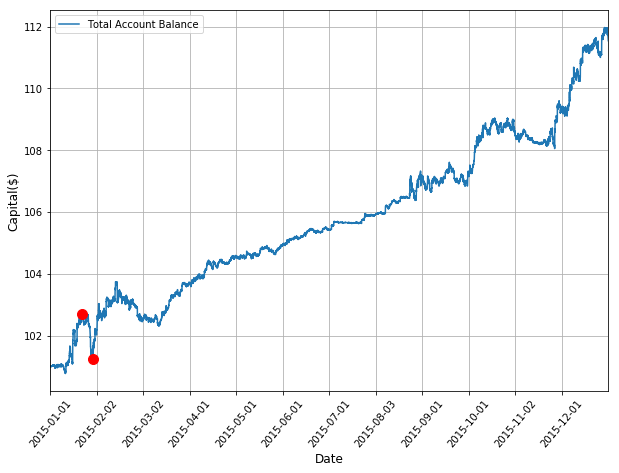

In [112]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_test_w_costs,
                                                  cum_returns_threshold_test_w_costs,
                                                  performance_threshold_test,
                                                  pairs, ticker_segment_dict,
                                                  n_years_test)

In [123]:
print('Corrected Annualized SR: {:.2f}'.format(0.2020276167935731*17.47))

Corrected Annualized SR: 3.53


### Approach 2: Keeping only pairs that had positive returns in the training period

In [113]:
cum_returns_threshold_train_w_costs = np.asarray(cum_returns_threshold_train_w_costs)
profitable_pairs_indices = np.argwhere(cum_returns_threshold_train_w_costs > 0)
profitable_pairs = [pairs[i] for i in profitable_pairs_indices.flatten()]

In [114]:
results_without_costs, results_with_costs, performance_threshold_test = \
                            trader.apply_trading_strategy(profitable_pairs, 
                                                           'fixed_beta',
                                                            2,#entry_multiplier,
                                                            0,#exit_multiplier,
                                                            test_mode=True,
                                                            train_val_split=train_val_split
                                                           )
sharpe_results_threshold_test_nocosts, cum_returns_threshold_test_nocosts = results_without_costs
sharpe_results_threshold_test_w_costs, cum_returns_threshold_test_w_costs = results_with_costs

 entry delay turned on.
Pair: 77/77

Average SR:  0.955764259625151
Annual ROI:  12.44616190194594
80.51948051948052 % of the pairs had positive returns
Sharpe Ratio using annual return 3.953084773956406
Autocorrelation:  -0.11677534749657806
Daily Sharpe Ratio 0.23565017335431812
Portfolio Sharpe Ratio:  0.23565017335431812
Total number of trades:  173
Positive trades:  147
Negative trades:  26
Max DD period: 21.0 days
Maximum drawdown of portfolio: -0.97%


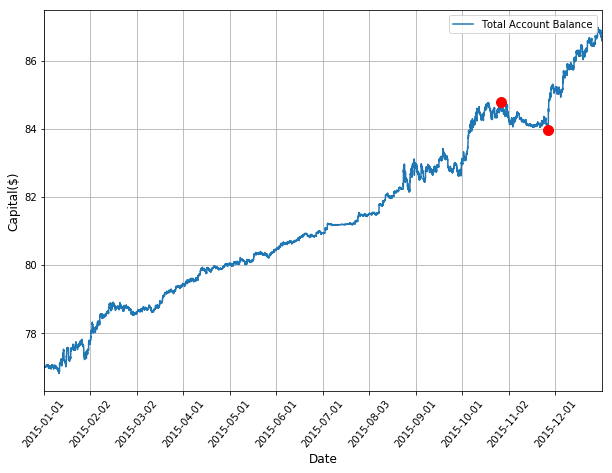

In [115]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_test_w_costs,
                                                  cum_returns_threshold_test_w_costs,
                                                  performance_threshold_test,
                                                  profitable_pairs, ticker_segment_dict,
                                                  n_years_test)

In [124]:
print('Corrected Annualized SR: {:.2f}'.format(0.23565017335431812*17.47))

Corrected Annualized SR: 4.12


### Approach 3: Keeping only top 10 pairs

In [116]:
sharpe_results_threshold_train_w_costs = np.asarray(sharpe_results_threshold_train_w_costs)
sorted_pairs_indices = np.argsort(sharpe_results_threshold_train_w_costs)[::-1][:10]
top_10_pairs = [pairs[i] for i in sorted_pairs_indices.flatten()]

In [117]:
# sorting by returns seems to give better results

In [118]:
cum_returns_threshold_train_w_costs = np.asarray(cum_returns_threshold_train_w_costs)
sorted_pairs_indices = np.argsort(cum_returns_threshold_train_w_costs)[::-1][:10]
top_10_pairs = [pairs[i] for i in sorted_pairs_indices.flatten()]

In [119]:
results_without_costs, results_with_costs, performance_threshold_test = \
                            trader.apply_trading_strategy(top_10_pairs, 
                                                           'fixed_beta',
                                                            2,#entry_multiplier,
                                                            0,#exit_multiplier,
                                                            test_mode=True,
                                                            train_val_split=train_val_split
                                                           )
sharpe_results_threshold_test_nocosts, cum_returns_threshold_test_nocosts = results_without_costs
sharpe_results_threshold_test_w_costs, cum_returns_threshold_test_w_costs = results_with_costs

 entry delay turned on.
Pair: 10/10

Average SR:  1.0509364520518412
Annual ROI:  17.43442092420109
70.0 % of the pairs had positive returns
Sharpe Ratio using annual return 3.2423836449996335
Autocorrelation:  -0.10277811322727184
Daily Sharpe Ratio 0.1899613313591282
Portfolio Sharpe Ratio:  0.1899613313591282
Total number of trades:  17
Positive trades:  15
Negative trades:  2
Max DD period: 5.0 days
Maximum drawdown of portfolio: -2.59%


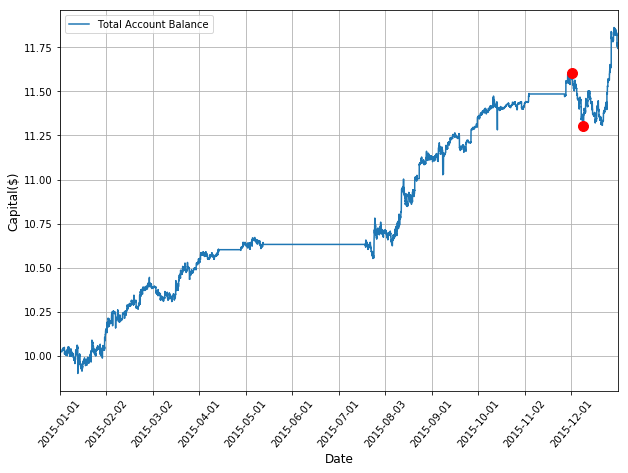

In [120]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_test_w_costs,
                                                  cum_returns_threshold_test_w_costs,
                                                  performance_threshold_test,
                                                  top_10_pairs, ticker_segment_dict,
                                                  n_years_test)

In [125]:
print('Corrected Annualized SR: {:.2f}'.format(0.1899613313591282*17.47))

Corrected Annualized SR: 3.32


# Validate the results

In [121]:
pairs_summary

,Leg1,Leg1_Segmt,Leg2,Leg2_Segmt,t_statistic,p_value,zero_cross,half_life,hurst_exponent,positive_trades,negative_trades,sharpe_result,positive_trades_per_pair_pct
0,AGQ,Leveraged Commodities: Precious Metals Silver,GOEX,Equity: Global Gold Miners,-3.641566,0.005014,200,1581,0.443185,5,0,2.896705,100.0
1,CANE,Commodities: Agriculture Sugar,GOEX,Equity: Global Gold Miners,-3.536864,0.007089,228,787,0.421935,2,0,2.319540,100.0
2,MLPG,Equity: U.S. MLPs,PALL,Commodities: Precious Metals Palladium,-3.980405,0.001517,338,441,0.365615,2,0,1.664942,100.0
3,CANE,Commodities: Agriculture Sugar,URA,Equity: Global Nuclear Energy,-4.605519,0.000126,361,547,0.408071,2,0,1.602294,100.0
4,CANE,Commodities: Agriculture Sugar,REMX,Equity: Global Metals & Mining,-4.997243,0.000022,344,411,0.387130,1,0,1.367882,100.0
5,AGQ,Leveraged Commodities: Precious Metals Silver,GDXJ,Equity: Global Gold Miners,-3.998006,0.001421,425,1103,0.472849,2,0,1.232410,100.0
6,COPX,Equity: Global Metals & Mining,PPLT,Commodities: Precious Metals Platinum,-3.889202,0.002116,278,1265,0.463621,1,0,0.267985,100.0
7,AGQ,Leveraged Commodities: Precious Metals Silver,GDX,Equity: Global Gold Miners,-4.024961,0.001285,397,1103,0.477619,0,0,0.000000,NaN
8,DGLD,Inverse Commodities: Precious Metals Gold,MLPG,Equity: U.S. MLPs,-3.432134,0.009911,184,790,0.402520,0,1,-0.024573,0.0
9,KOL,Equity: Global Coal,CANE,Commodities: Agriculture Sugar,-3.794985,0.002959,320,559,0.406876,0,1,-0.817819,0.0
